<h3>Дисперсійний аналіз</h3>

В данной работе я хочу анализировать влияние количества детей у женщин и стоимостью случайного лечения этих женщин. Для этого применим дисперсионный анализ.

1. Розрахувати та вивести у вигляді таблиці статистичні характиристики даних (середні та стандартні відхилення для кожної з груп).

In [29]:
import pandas as pd
import seaborn as sns

medical_cost = pd.read_csv("insurance.csv")
medical_cost.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [27]:
groups = pd.DataFrame(columns = ['No kids', '1 kid', '2 kids', '3 kids'])
kid_0 = []
kid_1 = []
kid_2 = []
kid_3 = []

for i in range(len(medical_cost)):
    if (medical_cost['sex'][i] == "female"):
        if (medical_cost['children'][i] == 0 and len(kid_0) < 75):
            kid_0.append(medical_cost['charges'][i])
        elif (medical_cost['children'][i] == 1 and len(kid_1) < 75):
            kid_1.append(medical_cost['charges'][i])
        elif (medical_cost['children'][i] == 2 and len(kid_2) < 75):
            kid_2.append(medical_cost['charges'][i])
        elif (medical_cost['children'][i] == 3 and len(kid_3) < 75):
            kid_3.append(medical_cost['charges'][i])

groups['No kids'] = kid_0           
groups['1 kid'] = kid_1
groups['2 kids'] = kid_2
groups['3 kids'] = kid_3
groups.index = [i + 1 for i in range(len(groups))]

groups

,No kids,1 kid,2 kids,3 kids
1,16884.92400,8240.5896,12268.63225,7281.50560
2,3756.62160,10797.3362,4949.75870,14001.13380
3,28923.13692,4149.7360,6313.75900,15612.19335
4,27808.72510,37701.8768,3393.35635,8059.67910
5,11090.71780,23244.7902,3579.82870,11741.72600
...,...,...,...,...
71,13429.03540,8547.6913,8310.83915,7537.16390
72,11658.37915,42969.8527,10848.13430,12479.70895
73,18955.22017,9182.1700,3925.75820,4296.27120
74,13217.09450,2709.1119,9095.06825,9101.79800


In [28]:
indicators = pd.DataFrame(columns = ['No kids', '1 kid', '2 kids', '3 kids'])
mean_row = pd.Series(data = {'No kids': groups['No kids'].mean(),
                           '1 kid': groups['1 kid'].mean(),
                           '2 kids': groups['2 kids'].mean(),
                           '3 kids': groups['3 kids'].mean()}, name = 'Mean')
std_row = pd.Series(data = {'No kids': groups['No kids'].std(),
                           '1 kid': groups['1 kid'].std(),
                           '2 kids': groups['2 kids'].std(),
                           '3 kids': groups['3 kids'].std()}, name = 'STD')
sum_row = pd.Series(data = {'No kids': groups['No kids'].sum(),
                           '1 kid': groups['1 kid'].sum(),
                           '2 kids': groups['2 kids'].sum(),
                           '3 kids': groups['3 kids'].sum()}, name = 'Sum')

indicators = indicators.append(round(mean_row, 3), ignore_index = False)
indicators = indicators.append(round(std_row, 3), ignore_index = False)
indicators = indicators.append(round(sum_row, 3), ignore_index = False)

indicators

,No kids,1 kid,2 kids,3 kids
Mean,11903.467,13022.866,13381.481,13832.987
STD,10476.478,12966.262,11080.319,10198.043
Sum,892760.005,976714.930,1003611.082,1037474.030


2. Побудувати графік розкиду в групах.

[Text(0.5, 0, 'Medical costs ')]

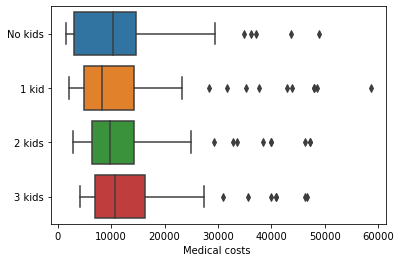

In [31]:
sns.boxplot(data = groups, orient = 'h').set(xlabel = 'Medical costs ')

3. Побудувати функцію, що реалізовує однофакторний дисперсійний аналіз.

In [50]:
def ANOVA(groups):
    keys = groups.keys()
    c = len(groups.columns)
    Tc = [groups[keys[i]].sum() for i in range(c)]
    n = len(groups)
    N = n*c
    sq_xi_sum = 0
    for i in range(c):
        for j in range(1,n+1):
            sq_xi_sum += (groups[keys[i]][j])**2

    SS_fact = (sum(Tc[i]**2 for i in range(len(Tc)))/n) - ((sum(Tc)**2)/N)
    SS_zag = sq_xi_sum - (sum(Tc)**2)/N
    SS_vyp = SS_zag - SS_fact
    
    d_fact = c - 1
    d_zag = N - 1
    d_vyp = d_zag - d_fact
    
    MS_fact = SS_fact/d_fact
    MS_vyp = SS_vyp/d_vyp
    
    F_emp = MS_fact/MS_vyp
    
    Fisher_table = pd.read_excel("Fisher.xlsx")
    df_index1 = 0
    df_index2 = 0
    for i in range(1,Fisher_table.shape[0]-1):
        if (Fisher_table.iloc[i,0] <= d_vyp):
            df_index1 = i
    if (Fisher_table.iloc[Fisher_table.shape[0]-2,0] < d_vyp):
        df_index1 = Fisher_table.shape[0]-1
        
    for i in range(1,Fisher_table.shape[1]-1):
        if (Fisher_table.iloc[0,i] <= d_fact):
            df_index2 = i
    if (Fisher_table.iloc[0,Fisher_table.shape[1]-2] < d_fact):
        df_index2 = Fisher_table.shape[1]-1
    F_kryt = Fisher_table.iloc[df_index1, df_index2]
    
    table_cols = ['SS(факт)','SS(заг)','SS(вип)','d(факт)','d(заг)','d(вип)','MS(факт)','MS(вип)','F(емпір)','F(крит)']
    res_table = pd.DataFrame([SS_fact,SS_zag,SS_vyp,d_fact,d_zag,d_vyp,MS_fact,MS_vyp,F_emp,F_kryt],
                             columns = ['Results'],index = table_cols)
    
    significant = True if abs(F_emp) < F_kryt else False
    if (significant == True):
        print('F(емпір) < F(крит)')
        print('SIGNIFICANT')
    else:
        print('F(емпір) > F(крит)')
        print('NON SIGNIFICANT')
    
    return res_table

4. Вивести результати розрахунку кожного з етапів вказаних вище у вигляді таблиці.
5. Перевірити результат роботи функції на реальних або сгенерованих даних. Зробити висновок.

In [51]:
ANOVA(groups)

F(емпір) < F(крит)
SIGNIFICANT


,Results
SS(факт),1.528010e+08
SS(заг),3.749720e+10
SS(вип),3.734440e+10
d(факт),3.000000e+00
d(заг),2.990000e+02
d(вип),2.960000e+02
MS(факт),5.093368e+07
MS(вип),1.261635e+08
F(емпір),4.037116e-01
F(крит),2.300000e+00


Нулевая гипотиза средних подтверждается. Средние независимых груп равны. Зависимости между количеством детей и стоимостью лечения их матерей сомнительна.